12/14/18
Data generated by Wenchao

## Import Library

In [15]:
# Project specific libraries
library(limma)
library(edgeR)
library(DESeq2)
library(reshape2)
library(ggplot2)
library(cowplot)
library("pheatmap")
library("RColorBrewer")

In [3]:
# Import Lib for exixting scripts
library(devtools)
library(roxygen2)

#### Working directory

In [4]:
# DFCI
#setwd ("Z:/Ajit/wenchao data")
setwd ("C:/Users/Ajit/Dropbox (Partners HealthCare)/Data/Wenchao_final_data/transcriptomics")

## Import data

In [5]:
data <- read.table("RawData.txt", header=T, sep="\t")
pdata <- read.table("pdata.txt", header=T, sep="\t")

### Pre-processing

In [6]:
# Remove transcripts that are not expressed in 3 or more samples
#data <- data[rowSums(data[2:ncol(data)])!=0, ]
data <- data[apply(data[2:ncol(data)] == 0, 1, sum) <= 3, ]
dim (data)

[1] 8972   19

In [7]:
# Merge multiple transcripts into one gene
# Import function
source_url("https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/r_scripts/collapse_to_one_gene.R")
# Merge
data_merged <- genesummary (data)
dim(data_merged)
head(data_merged)

SHA-1 hash of file is a0c6a4622daa5b3775f335059a29d6224d9f4032


[1] 8972   18

,P1_DMSO,P2_DMSO,P3_DMSO,P1_Len,P2_Len,P3_Len,P1_Pom,P2_Pom,P3_Pom,R1_DMSO,R2_DMSO,R3_DMSO,R1_Len,R2_Len,R3_Len,R1_Pom,R2_Pom,R3_Pom
AAAS,23,15,8,9,8,0,11,12,2,12,14,17,8,2,9,13,14,23
AACS,12,12,11,6,6,0,10,21,4,4,5,3,3,1,16,9,1,6
AAED1,20,25,20,12,9,2,14,17,5,17,11,8,11,3,16,14,16,6
AAGAB,8,11,14,7,9,1,12,8,4,7,19,10,2,5,20,9,12,14
AAK1,17,17,12,15,24,3,13,13,1,13,12,6,15,9,6,10,17,13
AAMDC,4,3,3,3,4,2,8,5,1,2,2,2,1,0,3,3,3,4


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


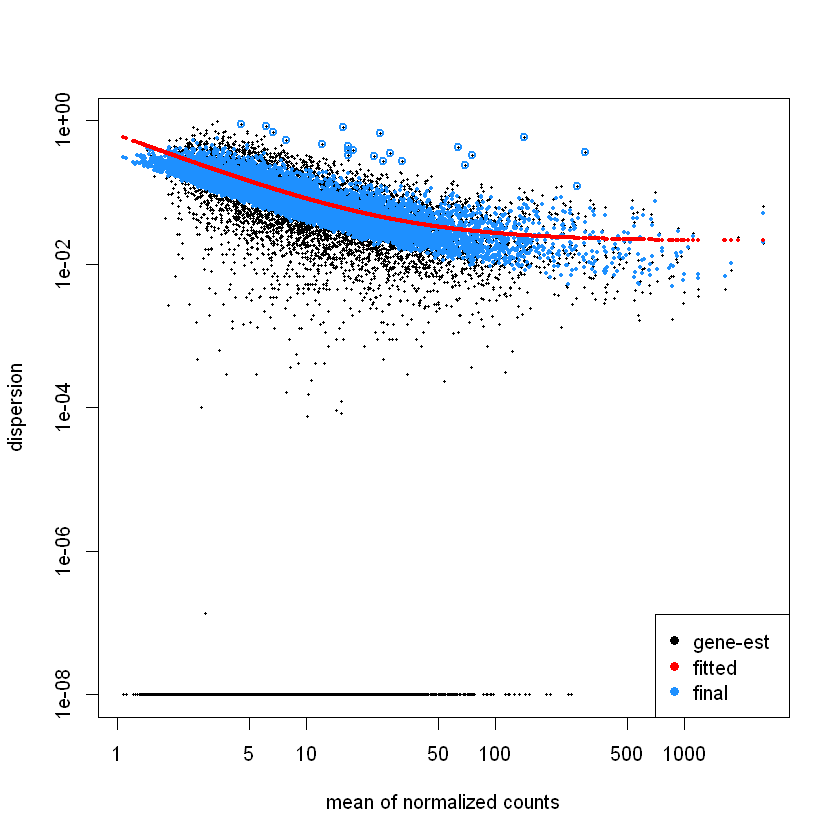

In [18]:
# Normalise data using limma-voom
# Create design matrix
#design <- model.matrix(~ pdata$Resistance)
# Apply voom transformation
#nf <- calcNormFactors(data_merged)
#v <- voom(data_merged, design, lib.size=colSums(data_merged)*nf, normalize.method="quantile", plot=TRUE)

# Normalise data using DE-Seq
dds <- DESeqDataSetFromMatrix(countData = data_merged, colData = pdata, design = ~ Treatment + Resistance)
dds <- DESeq(dds)
plotDispEsts(dds)

# EdgeR normalisation
#dge <- DGEList(counts=data_merged, group=pdata$Resistance)
# Normalize by total count
#dge <- calcNormFactors(dge)
# Create the contrast matrix
#design.mat <- model.matrix(~ 0 + dge$samples$group)
#colnames(design.mat) <- levels(dge$samples$group)
# Estimate dispersion parameter for GLM
#dge <- estimateGLMCommonDisp(dge, design.mat)
#dge <- estimateGLMTrendedDisp(dge, design.mat, method="power")
#dge<- estimateGLMTagwiseDisp(dge,design.mat)
#plotBCV(dge)

In [19]:
# Normalize the data by rlog method for other analysis
rld <- rlog(dds, blind=FALSE)

In [20]:
# Extract the normalised data from the deseq file
#n_data <- data.frame(counts(dds, normalized=TRUE))
n_data <- data.frame(assay(rld))
head(n_data)

,P1_DMSO,P2_DMSO,P3_DMSO,P1_Len,P2_Len,P3_Len,P1_Pom,P2_Pom,P3_Pom,R1_DMSO,R2_DMSO,R3_DMSO,R1_Len,R2_Len,R3_Len,R1_Pom,R2_Pom,R3_Pom
AAAS,3.671929,3.275507,2.850717,2.935623,2.768541,2.828600,3.050357,3.081495,3.071955,3.088215,3.172411,3.571823,3.572597,2.793540,2.901428,3.163444,3.298136,3.710470
AACS,2.773457,2.765474,2.732351,2.342137,2.265639,2.265641,2.645112,3.237126,2.920459,2.108793,2.180829,2.122380,2.527620,2.178140,3.014624,2.558103,1.818384,2.338692
AAED1,3.644415,3.849744,3.677434,3.248145,2.943339,3.420357,3.342119,3.469888,3.702957,3.477391,3.089231,3.086235,3.987633,3.078497,3.445062,3.326458,3.518868,2.796051
AAGAB,2.738518,2.948391,3.174986,2.690805,2.758531,2.896398,3.032873,2.717261,3.275351,2.643149,3.354794,3.043558,2.712322,3.084167,3.461896,2.811156,3.089815,3.179975
AAK1,3.478724,3.469144,3.219180,3.411358,3.730057,3.572530,3.263271,3.227083,3.033199,3.234179,3.134388,2.892474,4.278427,3.728627,2.745367,3.051078,3.555039,3.287603
AAMDC,1.358578,1.240299,1.258591,1.263190,1.325191,1.675409,1.750704,1.450659,1.377272,1.114112,1.098350,1.193114,1.269339,1.057133,1.245258,1.242500,1.278049,1.376754


## Data quality assessment by sample clustering and visualization 


Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

No id variables; using all as measure variables
No id variables; using all as measure variables
Warning message:
"Removed 6476 rows containing non-finite values (stat_boxplot)."

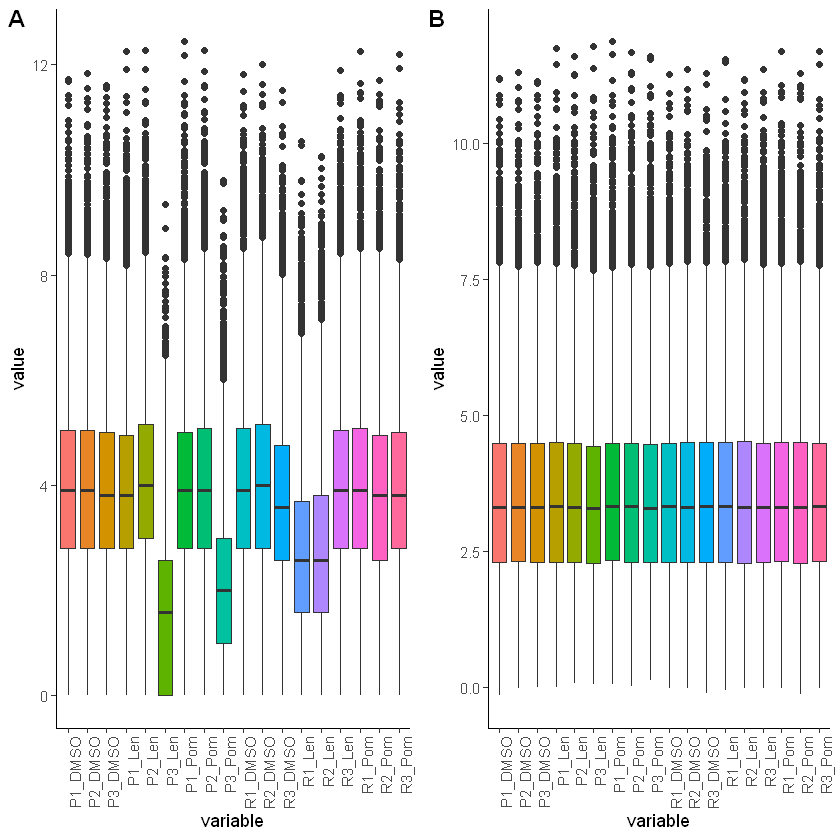

In [14]:
# Vizulaize expression profile before and after normalization
p1 <- ggplot(data = melt(log2(data_merged)), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))+
      theme_classic()+
      theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))
# After normalization
p2 <- ggplot(data = melt(n_data), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))+
      theme_classic()+
      theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))

plot_grid(p1, p2, labels = "AUTO")


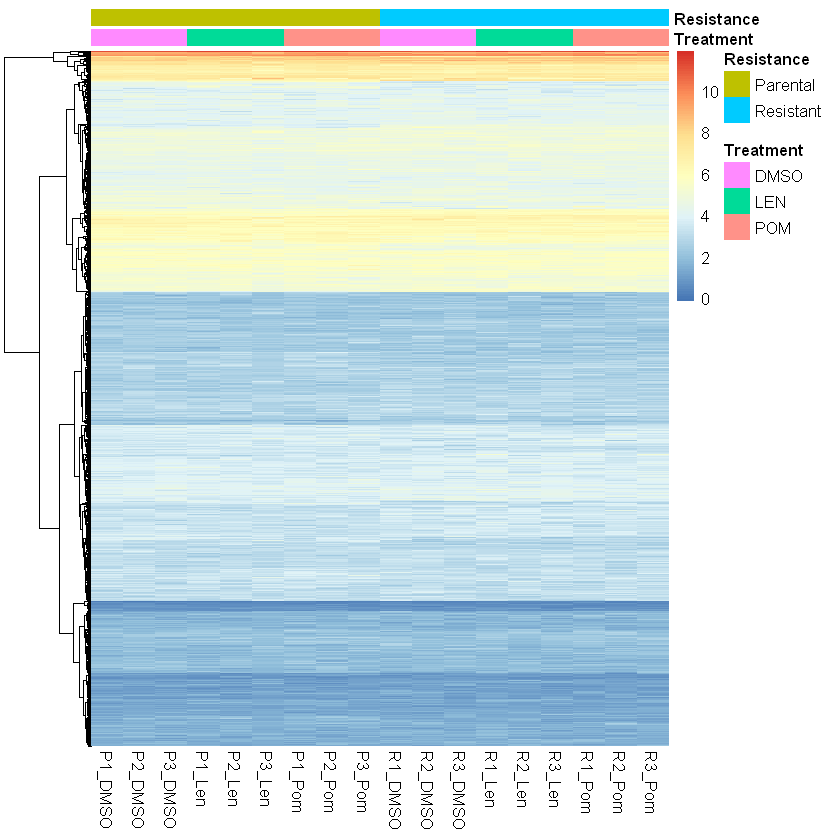

In [15]:
# Heatmap of the count matrix
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)
df <- as.data.frame(colData(dds)[,c("Treatment","Resistance")])
pheatmap(assay(rld)[select,], cluster_rows=TRUE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

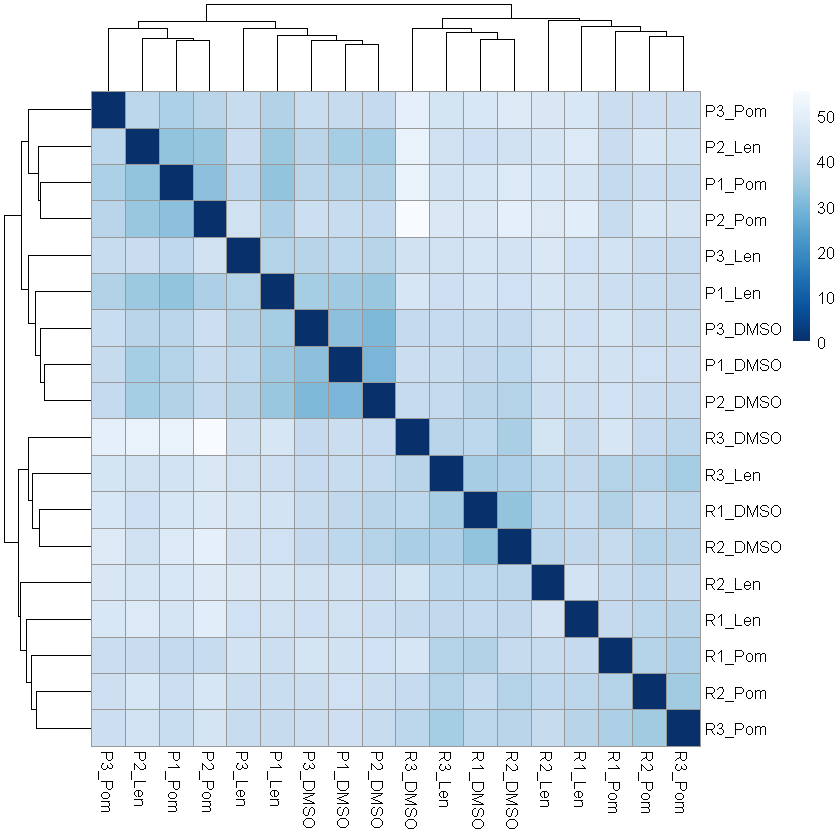

In [16]:
# Heatmap of the sample-to-sample distances
sampleDists <- dist(t(assay(rld)))
# Heatmap
sampleDistMatrix <- as.matrix(sampleDists)
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

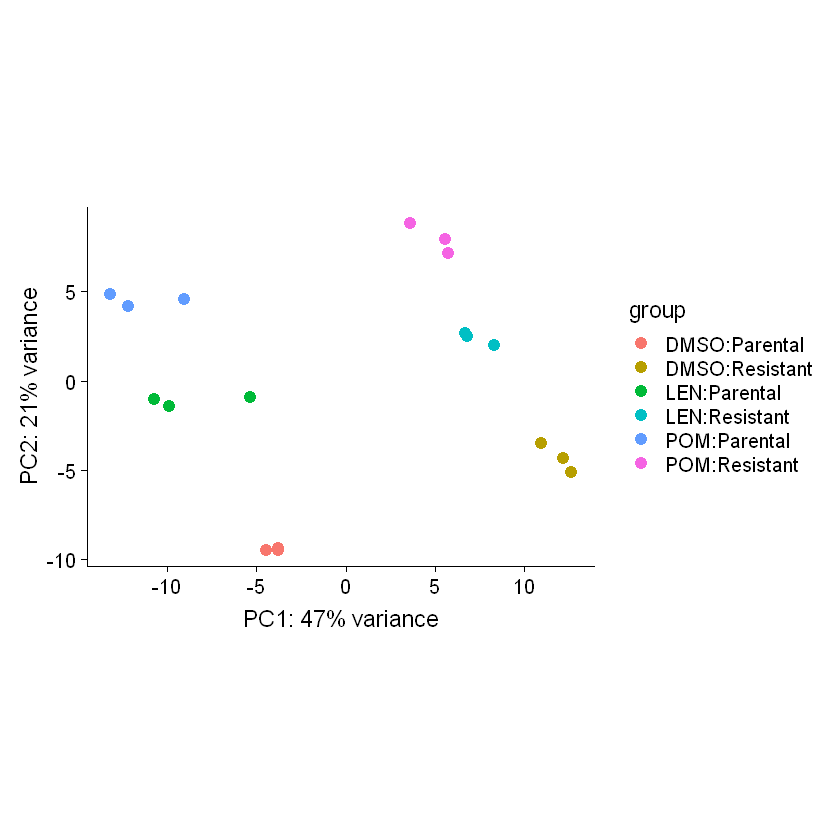

In [17]:
# Plot PCA
plotPCA(rld, intgroup=c("Treatment","Resistance"))

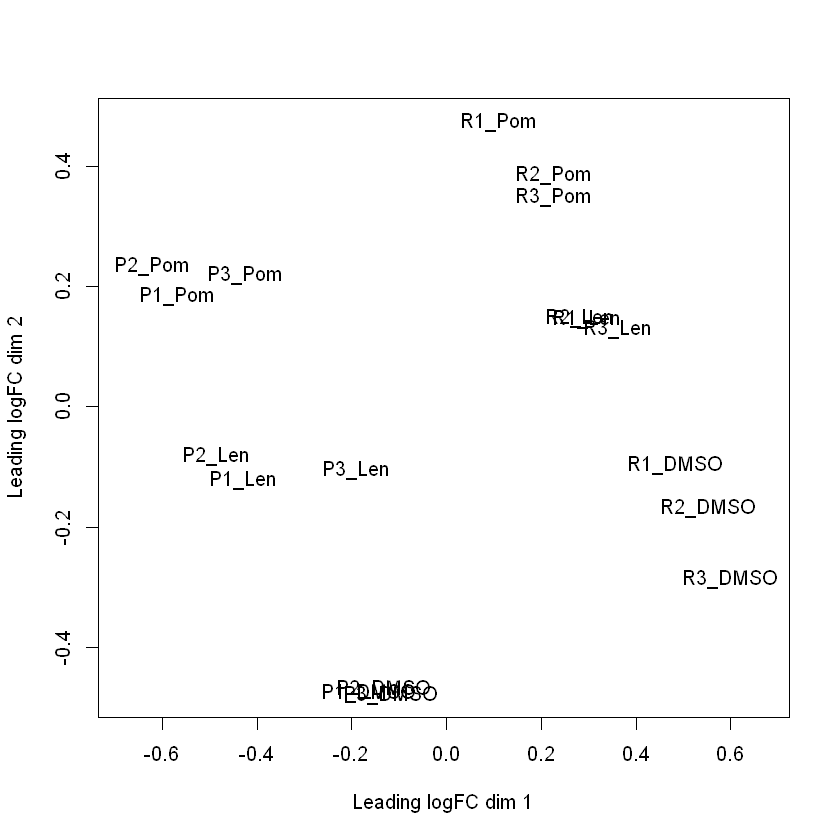

In [18]:
# Multidimensional scaling (MDS)
plotMDS(n_data)

## Differential gene expression analysis

In [41]:
# Results
res <- results(dds)
res

log2 fold change (MLE): Resistance Resistant vs Parental 
Wald test p-value: Resistance Resistant vs Parental 
DataFrame with 8972 rows and 6 columns
               baseMean      log2FoldChange             lfcSE
              <numeric>           <numeric>         <numeric>
AAAS    8.9736581454577   0.342599647292942 0.286852395701988
AACS   5.96755363249809  -0.824944536227357 0.396483687144807
AAED1  11.2105717389192   -0.27858085361327 0.273404163244644
AAGAB  8.15046150108002   0.344181980614843 0.293013218092002
AAK1   11.1134136942571 -0.0789027354036873 0.287185986205957
...                 ...                 ...               ...
ZXDC   4.93478256721758    1.59745770284082 0.419532334675713
ZYG11B  8.9867968316071    0.15774887363057 0.289706827767862
ZYX    22.9530223068537   0.478202658273611 0.182763204405466
ZZEF1   3.2691623622525   0.130051348549491 0.468522356340183
ZZZ3   10.4880433106417  0.0627686377292221 0.237327499020734
                     stat               pval

In [23]:
resLFC <- lfcShrink(dds, coef="Resistance_Resistant_vs_Parental", type="apeglm")
resOrdered <- resLFC[order(resLFC$padj),]
resOrdered

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    bioRxiv. https://doi.org/10.1101/303255


log2 fold change (MAP): Resistance Resistant vs Parental 
Wald test p-value: Resistance Resistant vs Parental 
DataFrame with 8972 rows and 5 columns
                baseMean      log2FoldChange              lfcSE
               <numeric>           <numeric>          <numeric>
C6orf48 266.709212358637    2.92143792513832  0.137536271504392
CSNK2B  187.817115960673    1.72054959328364 0.0818568994478154
RGS16   168.974089317636    2.59944606876136  0.166668494410846
FLOT1   142.435693704294    1.56843523312442 0.0996941524104103
BAG6    112.250579440066    1.60778091907579  0.103791100915315
...                  ...                 ...                ...
ZNF721  2.18997671212199   0.148260935261205  0.292632938954104
ZNF75A  1.52066329063576   0.196862618264883  0.340828088350871
ZNF75D  1.71169432034955 -0.0163134101932445  0.264980983002772
ZNF815P 2.12034251594574   0.216565574051899  0.341756510873884
ZUFSP   2.20809180884309 0.00570759970926643  0.259568583385602
                  

In [25]:
summary(resOrdered)


out of 8972 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 814, 9.1%
LFC < 0 (down)     : 805, 9%
outliers [1]       : 0, 0%
low counts [2]     : 348, 3.9%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



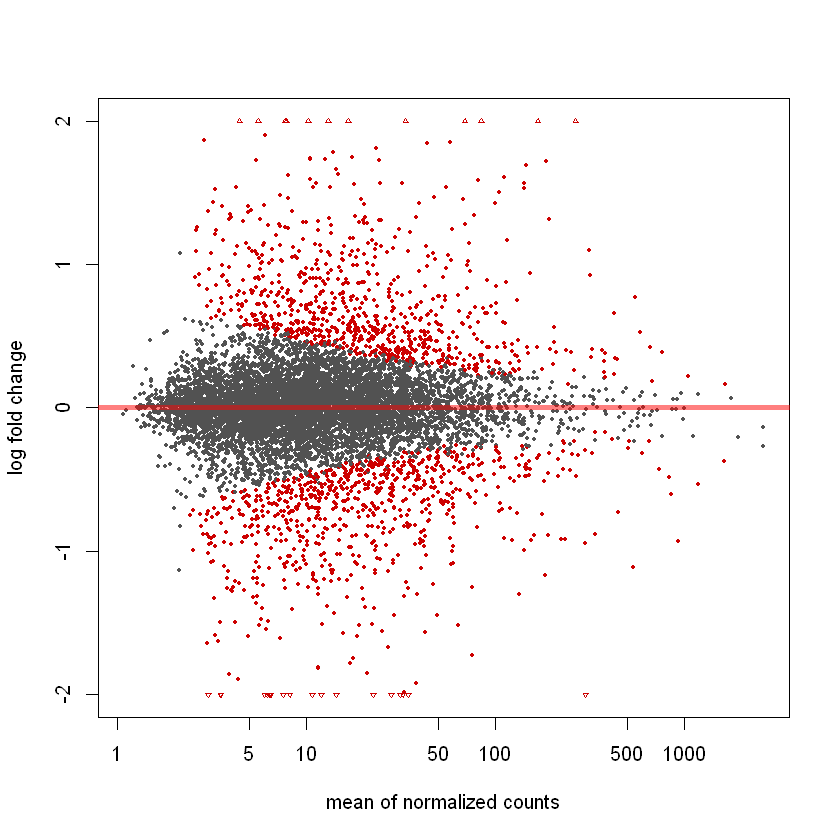

In [28]:
plotMA(resLFC, ylim=c(-2,2))

In [36]:
# Subset genes with a significant P value (<0.05)
sig_genes <- row.names(resLFC[which(resLFC$padj <= 0.05), ])

[1] "ABCA1"   "ABCA17P" "ABCF1"   "ABCF3"   "ABRACL"  "ABT1"

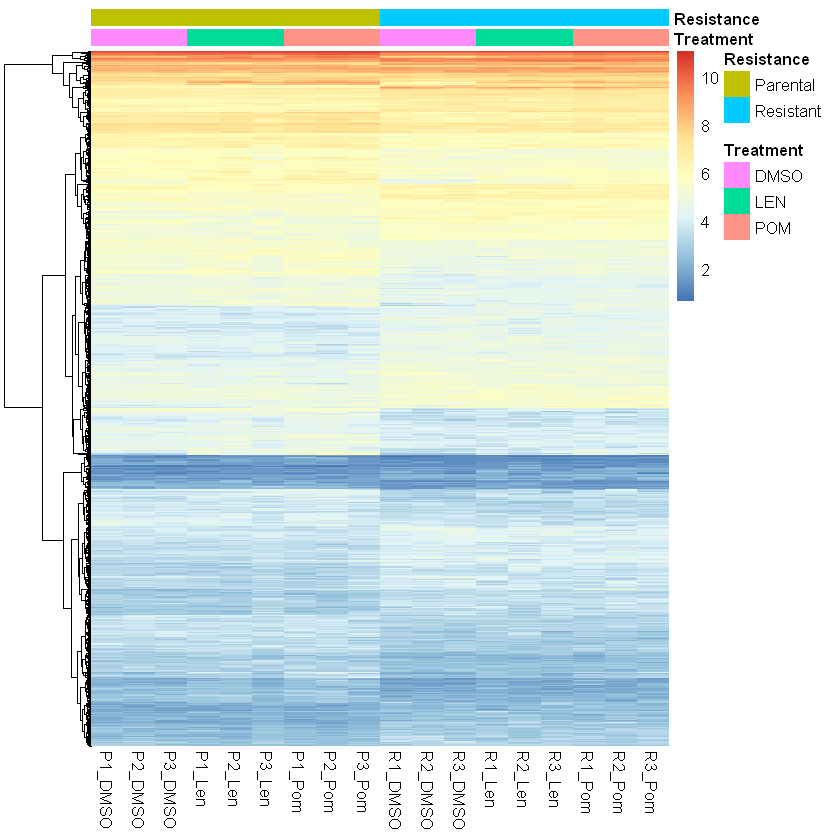

In [40]:
# Heat map of the significant genes (DEG)
df <- as.data.frame(colData(dds)[,c("Treatment","Resistance")])
pheatmap(assay(rld)[sig_genes,], cluster_rows=TRUE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

## Export data

In [42]:
# Export normalized matrix
write.csv(n_data, file = "Normalized_Data.csv")
# Export DEG matrix
write.csv(res, file = "DEG_results.csv")

## Looking for DEG's only using control samples (Parental vs Resistant)

In [6]:
include_list <- c("P1_DMSO","P2_DMSO","P3_DMSO","R1_DMSO","R2_DMSO","R3_DMSO")
control_data <- data[,c("gene", include_list)]
control_pdata <- pdata [pdata$Samples  %in% include_list, ]

In [7]:
control_pdata

,Samples,Resistance,Treatment,nodesign
1,P1_DMSO,Parental,DMSO,P_DMSO
2,P2_DMSO,Parental,DMSO,P_DMSO
3,P3_DMSO,Parental,DMSO,P_DMSO
10,R1_DMSO,Resistant,DMSO,R_DMSO
11,R2_DMSO,Resistant,DMSO,R_DMSO
12,R3_DMSO,Resistant,DMSO,R_DMSO


SHA-1 hash of file is a0c6a4622daa5b3775f335059a29d6224d9f4032
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
SHA-1 hash of file is ea705fcd7367ec2f0f16b7660c0ae5b75421a27c
Loading required package: cowplot

Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

No id variables; using all as measure variables
No id variables; using all as measure variables
Warning message:
"Removed 6749 rows containing non-finite values (stat_boxplot)."

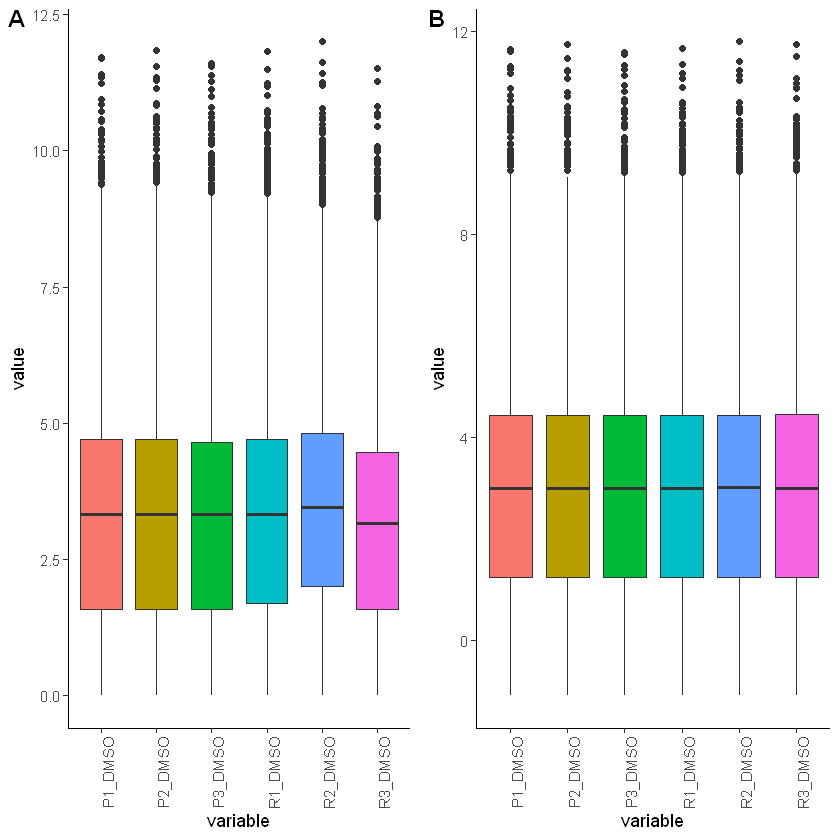

In [8]:
# Remove transcripts that are not expresed in three or more samples
control_data <- control_data[apply(control_data[2:ncol(control_data)] == 0, 1, sum) <= 3, ]
# Merge multiple transcripts into one gene
# Import function for merging transcripts into gene
source_url("https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/r_scripts/collapse_to_one_gene.R")
# Merge
control_data_merged <- genesummary (control_data)
# Normalise data using DE-Seq
c_dds <- DESeqDataSetFromMatrix(countData = control_data_merged, colData = control_pdata, design = ~ Resistance)
c_dds <- DESeq(c_dds)
#plotDispEsts(c_dds)
# Normalize the data by rlog method for other analysis
c_rld <- rlog(c_dds, blind=FALSE)
# Extract the normalised data from the deseq file
c_n_data <- data.frame(assay(c_rld))
# Import function for plotting before and after normalisation image
source_url("https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/r_scripts/plot_before_after_normalization.R")
# Plot before and after normalization
plotba (control_data_merged,c_n_data)

In [9]:
# Results
c_resLFC <- lfcShrink(c_dds, coef="Resistance_Resistant_vs_Parental", type="apeglm")
c_resOrdered <- c_resLFC[order(c_resLFC$padj),]
summary(c_resOrdered)

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    bioRxiv. https://doi.org/10.1101/303255



out of 12500 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 142, 1.1%
LFC < 0 (down)     : 137, 1.1%
outliers [1]       : 0, 0%
low counts [2]     : 4120, 33%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



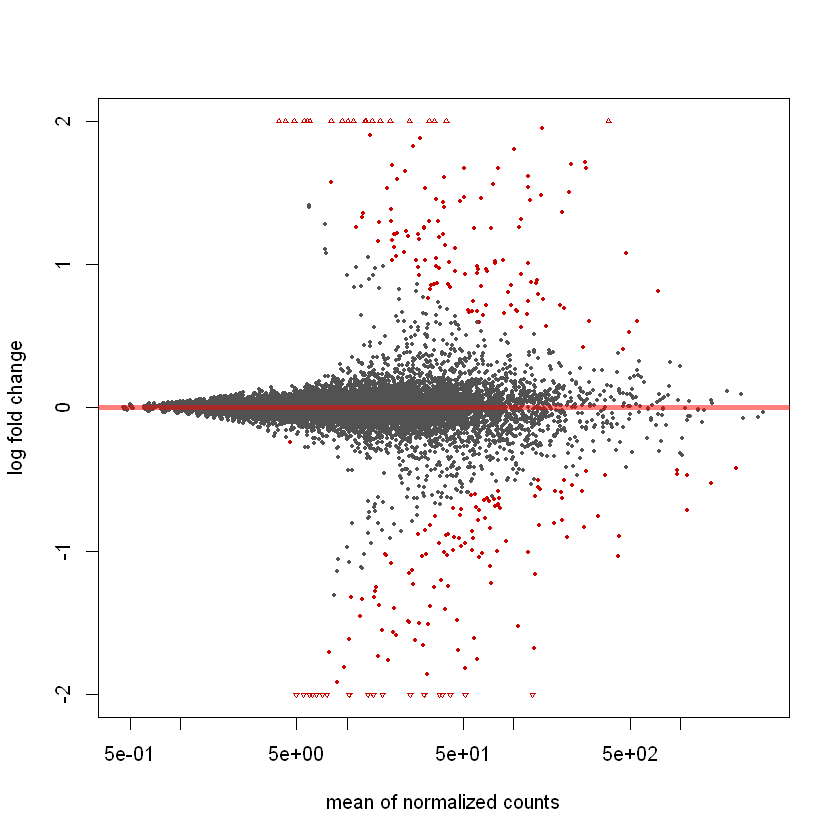

In [12]:
plotMA(c_resLFC, ylim=c(-2,2))

In [181]:
# Add script for GO enrichment analysis
source_url("https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/r_scripts/goenrichment.R")
# Run GO enrichment
goenrichment (data.frame(c_resLFC))

SHA-1 hash of file is 007d29aa9dc1262459cf93640d03f0754d654a5a

Building most specific GOs .....
	( 12078 GO terms found. )

Build GO DAG topology ..........
	( 16113 GO terms and 38254 relations. )

Annotating nodes ...............
	( 18493 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 3837 nontrivial nodes
		 parameters: 
			 test statistic: fisher


GO.ID,Term,Annotated,Significant,Expected,classicFisher
GO:0002274,myeloid leukocyte activation,638,27,6.69,7.0e-10
GO:0002443,leukocyte mediated immunity,868,31,9.11,2.1e-09
GO:0045055,regulated exocytosis,788,29,8.27,3.8e-09
GO:0006887,exocytosis,897,31,9.41,4.5e-09
GO:0001775,cell activation,1407,40,14.76,5.4e-09


### Export data

In [13]:
# Export normalized matrix
write.csv(c_n_data, file = "Normalized_Data_DMSO.csv")
# Export DEG matrix
write.csv(c_resLFC, file = "DEG_results_DMSO.csv")

## Pathway and enrichment analysis

In [24]:
library(pathview)
library(gage)
library(gageData)
data(kegg.sets.hs)
data(sigmet.idx.hs)
kegg.sets.hs = kegg.sets.hs[sigmet.idx.hs]

In [54]:
library(ReactomePA)

In [100]:
# Adding Entrez ID to results
require(org.Hs.eg.db)
allgenes <- toTable(org.Hs.egSYMBOL)
# Subset genes with a significant P value (<0.05)
our_genes <- data.frame(c_res)
with_entrez <- merge(allgenes,our_genes, by.x="symbol", by.y= "row.names")
with_entrez <- with_entrez[order(-with_entrez$log2FoldChange),]

In [101]:
de <- with_entrez[which(with_entrez$padj <= 0.05 & with_entrez$log2FoldChange >= 0.5), ]
de <- de$gene_id
head(de)
length(de)

[1] "5788"      "81831"     "79083"     "100129792" "400629"    "677800"

[1] 111

In [86]:
x <- enrichPathway(gene=de,pvalueCutoff=0.05, readable=T)
head(as.data.frame(x))

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
R-HSA-913531,R-HSA-913531,Interferon Signaling,9/68,197/10554,4.361691e-06,0.002302973,0.001969648,CD44/EIF4A2/EIF4G1/HLA-A/HLA-C/HLA-E/MT2A/NUP93/TRIM26,9
R-HSA-6798695,R-HSA-6798695,Neutrophil degranulation,13/68,479/10554,9.360909e-06,0.002471280,0.002113595,CD44/CHI3L1/CPNE1/CSNK2B/HLA-C/HSPA1A/HSPA1B/IMPDH2/NEU1/PSMD2/PTPRC/S100A9/TUBB,13
R-HSA-877300,R-HSA-877300,Interferon gamma signaling,6/68,92/10554,2.638584e-05,0.003739704,0.003198431,CD44/HLA-A/HLA-C/HLA-E/MT2A/TRIM26,6
R-HSA-429914,R-HSA-429914,Deadenylation-dependent mRNA decay,5/68,56/10554,2.833109e-05,0.003739704,0.003198431,CNOT1/EIF4A2/EIF4G1/LSM2/SKIV2L,5
R-HSA-1236977,R-HSA-1236977,Endosomal/Vacuolar pathway,3/68,11/10554,4.068243e-05,0.004296064,0.003674266,HLA-A/HLA-C/HLA-E,3
R-HSA-167242,R-HSA-167242,Abortive elongation of HIV-1 transcript in the absence of Tat,3/68,23/10554,4.131269e-04,0.031187553,0.026673565,NCBP2/NELFE/POLR2H,3


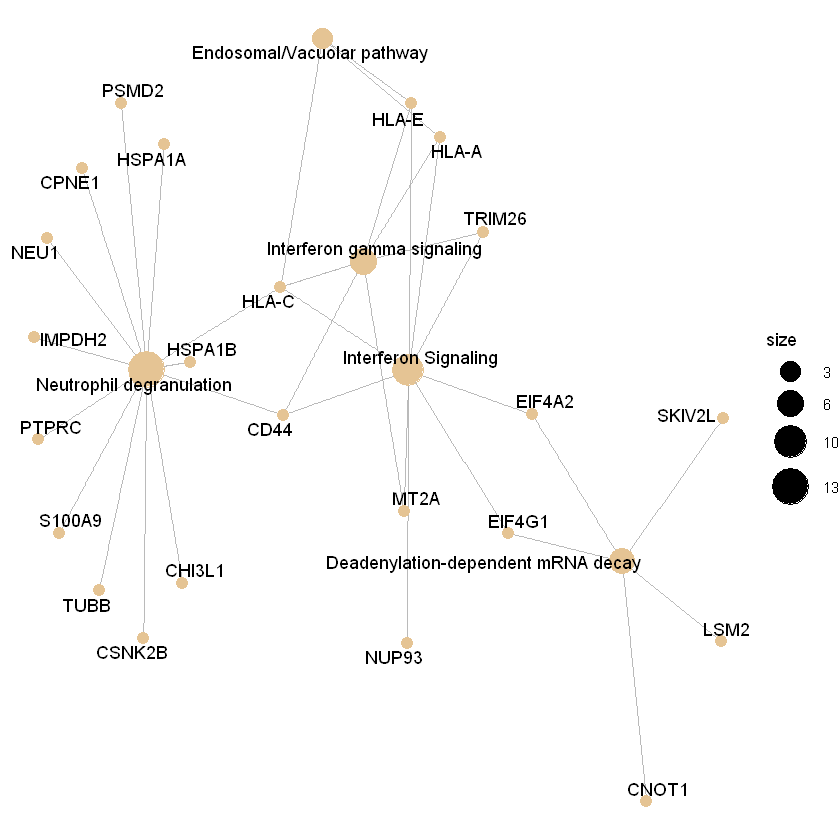

In [87]:
# Visualize enrichment result
cnetplot(x, categorySize="pvalue", foldChange=with_entrez$log2FoldChange)

In [128]:
# Prepare for GSEA analysis
ordered_de <- with_entrez[which(with_entrez$padj <= 0.05 & with_entrez$log2FoldChange >= 0.5), ]
ordered_de <- ordered_de[,c(2,4)]

## feature 1: numeric vector
geneList = ordered_de[,2]
## feature 2: named vector
names(geneList) = as.character(ordered_de[,1])
## feature 3: decreasing order
geneList = sort(geneList, decreasing = TRUE)

In [112]:
y <- gsePathway(geneList, nPerm=10000,
                pvalueCutoff=1,
                pAdjustMethod="BH", verbose=FALSE)
res <- as.data.frame(y)
head(res)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
R-HSA-1430728,R-HSA-1430728,Metabolism,16,-0.4102083,-1.861408,0.01831502,0.2564103,0.2313476,53,"tags=88%, list=48%, signal=53%",2806/80205/9688/1459/2778/25870/960/2876/4726/6165/5708/8904/3615
R-HSA-8953854,R-HSA-8953854,Metabolism of RNA,16,-0.3578947,-1.624024,0.04395604,0.3076923,0.2776171,78,"tags=94%, list=70%, signal=33%",3304/1974/8449/84248/22916/3303/26354/9688/23019/5437/6434/1981/6165/5708
R-HSA-1643685,R-HSA-1643685,Disease,12,-0.3737374,-1.498141,0.07345576,0.3427935,0.3092874,75,"tags=92%, list=68%, signal=33%",7936/4758/6048/22916/3303/1173/9688/5437/6165/5708
R-HSA-6798695,R-HSA-6798695,Neutrophil degranulation,13,0.5104667,1.419251,0.09927415,0.3474595,0.3134973,9,"tags=23%, list=8%, signal=24%",5788/6280/1116
R-HSA-168249,R-HSA-168249,Innate Immune System,16,0.4447412,1.294536,0.17946205,0.5024937,0.4533778,9,"tags=19%, list=8%, signal=20%",5788/6280/1116
R-HSA-1266738,R-HSA-1266738,Developmental Biology,11,0.4044229,1.078963,0.38788157,0.9050570,0.8165928,13,"tags=18%, list=12%, signal=18%",5788/85236


In [130]:
head(ordered_de, 15)

,symbol,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
6859,PTPRC,5788,31.253335,7.488114,1.2169173,6.153346,7.586487e-10,2.050799e-07
5585,NETO2,81831,6.010858,6.091734,1.3482489,4.518256,6.235097e-06,7.546040e-04
5074,MLPH,79083,4.303905,5.594555,1.4572065,3.839233,1.234192e-04,8.080101e-03
1252,CCDC152,100129792,5.568106,4.957470,1.4335018,3.458294,5.436085e-04,2.618069e-02
8949,TEX19,400629,14.202923,4.843088,1.3262056,3.651838,2.603703e-04,1.444969e-02
8365,SNORA12,677800,4.846862,4.776306,1.3957314,3.422081,6.214384e-04,2.877157e-02
4317,KIAA1217,56243,4.850875,4.764468,1.3733995,3.469106,5.221937e-04,2.529470e-02
7748,S100A9,6280,9.367204,4.221292,1.0101818,4.178744,2.931228e-05,2.641257e-03
1574,CHI3L1,1116,33.654536,4.053071,0.5622273,7.208954,5.638345e-13,3.374952e-10
5612,NFKBIZ,64332,5.829680,3.472520,1.0599843,3.276011,1.052846e-03,4.256019e-02


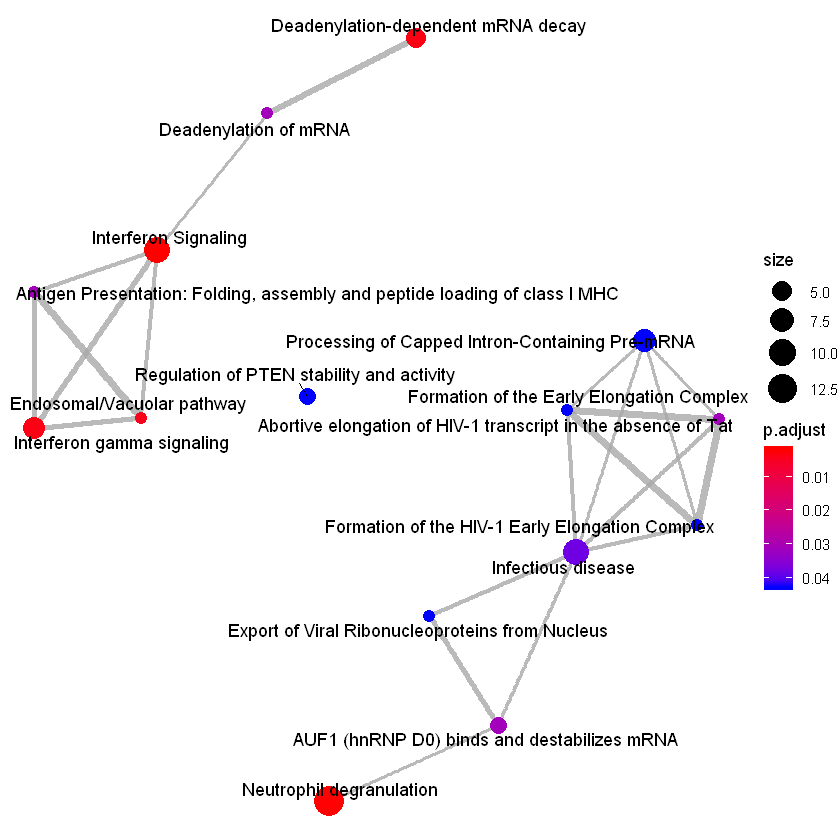

In [121]:
emapplot(x)

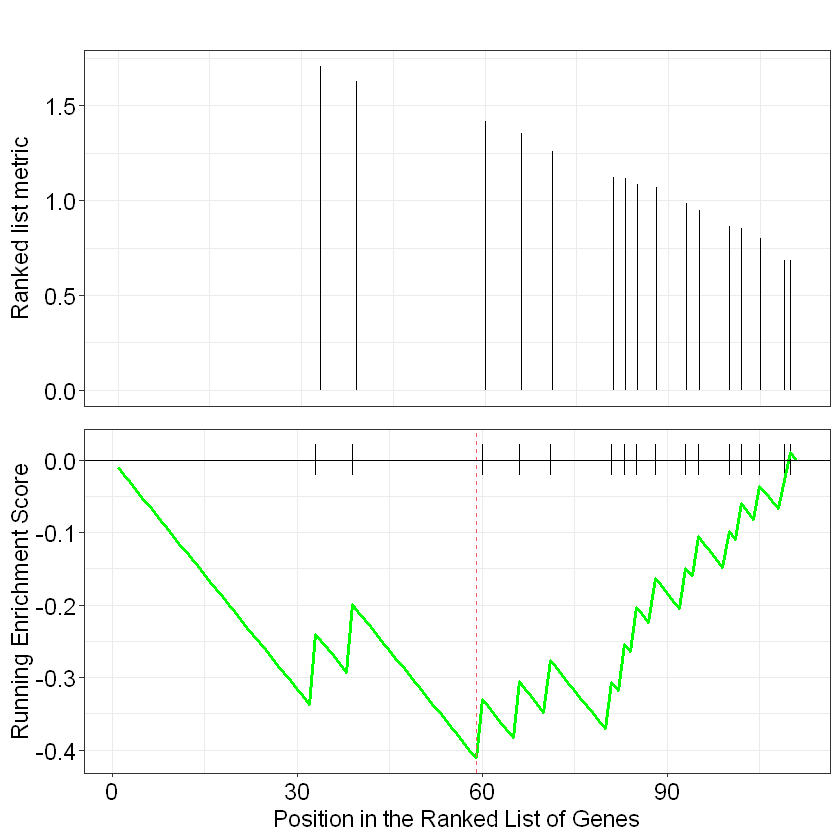

In [118]:
gseaplot(y, geneSetID = "R-HSA-1430728")

In [30]:
foldchanges = with_entrez$log2FoldChange
names(foldchanges) = with_entrez$gene_id

In [32]:
# Get the results
keggres = gage(foldchanges, gsets=kegg.sets.hs, same.dir=TRUE)

# Look at both up (greater), down (less), and statatistics.
lapply(keggres, head)

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
hsa00511 Other glycan degradation,0.02207105,2.135561,0.02207105,0.8181126,12,0.02207105
hsa04210 Apoptosis,0.02322039,2.012805,0.02322039,0.8181126,64,0.02322039
"hsa00250 Alanine, aspartate and glutamate metabolism",0.04431977,1.750374,0.04431977,0.8181126,19,0.04431977
hsa04150 mTOR signaling pathway,0.09271670,1.336038,0.09271670,0.8181126,41,0.09271670
hsa04722 Neurotrophin signaling pathway,0.09720131,1.302533,0.09720131,0.8181126,97,0.09720131
hsa04612 Antigen processing and presentation,0.09967588,1.294645,0.09967588,0.8181126,40,0.09967588
,p.geomean,stat.mean,p.val,q.val,set.size,exp1
hsa00071 Fatty acid metabolism,0.06793955,-1.527511,0.06793955,0.9095469,25,0.06793955
hsa04960 Aldosterone-regulated sodium reabsorption,0.09891950,-1.312328,0.09891950,0.9095469,19,0.09891950
hsa02010 ABC transporters,0.11615757,-1.214920,0.11615757,0.9095469,19,0.11615757


In [35]:
# Get the pathways
library("tidyverse")

keggrespathways = data.frame(id=rownames(keggres$greater), keggres$greater) %>% 
  tbl_df() %>% 
  filter(row_number()<=5) %>% 
  .$id %>% 
  as.character()
keggrespathways

[1] "hsa00511 Other glycan degradation"                   
[2] "hsa04210 Apoptosis"                                  
[3] "hsa00250 Alanine, aspartate and glutamate metabolism"
[4] "hsa04150 mTOR signaling pathway"                     
[5] "hsa04722 Neurotrophin signaling pathway"

In [36]:
# Get the IDs.
keggresids = substr(keggrespathways, start=1, stop=8)
keggresids

[1] "hsa00511" "hsa04210" "hsa00250" "hsa04150" "hsa04722"

In [52]:
# Define plotting function for applying later
#plot_pathway <- function(pid) pathview(gene.data=foldchanges, pathway.id=pid, species="hsa", new.signature=FALSE)

# plot multiple pathways (plots saved to disk and returns a throwaway list object)
tmp <- sapply(keggresids, function(pid) pathview(gene.data=foldchanges, pathway.id=pid, species="hsa"))
tmp

Info: Downloading xml files for hsa00511, 1/1 pathways..
Info: Downloading png files for hsa00511, 1/1 pathways..
Info: Downloading xml files for hsa04210, 1/1 pathways..
Info: Downloading png files for hsa04210, 1/1 pathways..


ERROR: Error in `$<-.data.frame`(`*tmp*`, "labels", value = c("", "", "", "", : replacement has 83 rows, data has 106


## DMSO (P) vs DMSO (R) and Drug (R)

In [18]:
# New dataframe with only DMSO parental and resistant samples
include_list_1 <- c("P1_DMSO","P2_DMSO","P3_DMSO","R1_DMSO","R2_DMSO","R3_DMSO")
dmsoP_dmsoR <- data_merged[,include_list_1]
dmsoP_dmsoR_P <- pdata [pdata$Samples  %in% include_list_1, ]
# New dataframe with only DMSO parental and Drug Resistant samples
include_list_2 <- c("P1_DMSO","P2_DMSO","P3_DMSO","R1_Len","R2_Len","R3_Len")
dmsoP_drugR <- data_merged[,include_list_2]
dmsoP_drugR_P <- pdata [pdata$Samples  %in% include_list_2, ]
# New dataframe with only DMSO parental and Drug Parental samples
include_list_3 <- c("P1_DMSO","P2_DMSO","P3_DMSO","P1_Len","P2_Len","P3_Len")
dmsoP_drugP <- data_merged[,include_list_3]
dmsoP_drugP_P <- pdata [pdata$Samples  %in% include_list_3, ]
# New dataframe with only DMSO Res and Drug Res samples
include_list_4 <- c("R1_DMSO","R2_DMSO","R3_DMSO","R1_Len","R2_Len","R3_Len")
dmsoR_drugR <- data_merged[,include_list_4]
dmsoR_drugR_P <- pdata [pdata$Samples  %in% include_list_4, ]
# New dataframe with only Parental with drug and Resistant line with drug samples
include_list_5 <- c("P1_Len","P2_Len","P3_Len","R1_Len","R2_Len","R3_Len")
drugP_drugR <- data_merged[,include_list_5]
drugP_drugR_P <- pdata [pdata$Samples  %in% include_list_5, ]

In [19]:
# Normalise data using DE-Seq for DMSO (P) vs DMSO (R)
dds_dmsoP_dmso <- DESeqDataSetFromMatrix(countData = dmsoP_dmsoR, colData = dmsoP_dmsoR_P, design = ~ Resistance)
dds_dmsoP_dmso <- DESeq(dds_dmsoP_dmso)
# Normalise data using DE-Seq for DMSO (P) vs Drug (R)
dds_dmsoP_drug <- DESeqDataSetFromMatrix(countData = dmsoP_drugR, colData = dmsoP_drugR_P, design = ~ Resistance)
dds_dmsoP_drug <- DESeq(dds_dmsoP_drug)
# Normalise data using DE-Seq for DMSO (P) vs Drug (P)
dds_dmsoP_drugP <- DESeqDataSetFromMatrix(countData = dmsoP_drugP, colData = dmsoP_drugP_P, design = ~ Treatment)
dds_dmsoP_drugP <- DESeq(dds_dmsoP_drugP)
# Normalise data using DE-Seq for DMSO (R) vs Drug (R)
dds_dmsoR_drugR <- DESeqDataSetFromMatrix(countData = dmsoR_drugR, colData = dmsoR_drugR_P, design = ~ Treatment)
dds_dmsoR_drugR <- DESeq(dds_dmsoR_drugR)
# Normalise data using DE-Seq for Drug (P) vs Drug (R)
dds_drugP_drugR <- DESeqDataSetFromMatrix(countData = drugP_drugR, colData = drugP_drugR_P, design = ~ Resistance)
dds_drugP_drugR <- DESeq(dds_drugP_drugR)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
factor levels were dropped which had no samples
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
factor levels were dropped which had no samples
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [20]:
# Calculating differentially expressed genes
# DMSO (P) vs DMSO (R)
dmsoP_dmso <- lfcShrink(dds_dmsoP_dmso, coef="Resistance_Resistant_vs_Parental", type="apeglm")
dmsoP_dmso_ordered <- dmsoP_dmso[order(dmsoP_dmso$padj),]
dmsoP_dmso_ordered <- dmsoP_dmso_ordered[which(dmsoP_dmso_ordered$padj <= 0.05), ]
# DMSO (P) vs Drug (R)
dmsoP_drug <- lfcShrink(dds_dmsoP_drug, coef="Resistance_Resistant_vs_Parental", type="apeglm")
dmsoP_drug_ordered <- dmsoP_drug[order(dmsoP_drug$padj),]
dmsoP_drug_ordered <- dmsoP_drug_ordered[which(dmsoP_drug_ordered$padj <= 0.05), ]
# DMSO (P) vs Drug (P)
dmsoP_drugP <- lfcShrink(dds_dmsoP_drugP, coef="Treatment_LEN_vs_DMSO", type="apeglm")
dmsoP_drugP_ordered <- dmsoP_drugP[order(dmsoP_drugP$padj),]
dmsoP_drugP_ordered <- dmsoP_drug_ordered[which(dmsoP_drugP_ordered$padj <= 0.05), ]
# DMSO (R) vs Drug (R)
dmsoR_drugR <- lfcShrink(dds_dmsoR_drugR, coef="Treatment_LEN_vs_DMSO", type="apeglm")
dmsoR_drugR_ordered <- dmsoR_drugR[order(dmsoR_drugR$padj),]
dmsoR_drugR_ordered <- dmsoR_drugR_ordered[which(dmsoR_drugR_ordered$padj <= 0.05), ]
# Drug (P) vs Drug (R)
drugP_drugR <- lfcShrink(dds_drugP_drugR, coef="Resistance_Resistant_vs_Parental", type="apeglm")
drugP_drugR_ordered <- drugP_drugR[order(drugP_drugR$padj),]
drugP_drugR_ordered <- drugP_drugR_ordered[which(drugP_drugR_ordered$padj <= 0.05), ]

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    bioRxiv. https://doi.org/10.1101/303255
using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    bioRxiv. https://doi.org/10.1101/303255
using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    bioRxiv. https://doi.org/10.1101/303255
using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distribu

In [12]:
library(VennDiagram)

Warning message:
"package 'VennDiagram' was built under R version 3.5.2"Loading required package: grid
Loading required package: futile.logger


In [14]:
head(row.names(dmsoR_drugR_ordered))

[1] "TM4SF1" "PLAUR"  "FCRLB"  "IFITM3" "RAB13"  "SPP1"

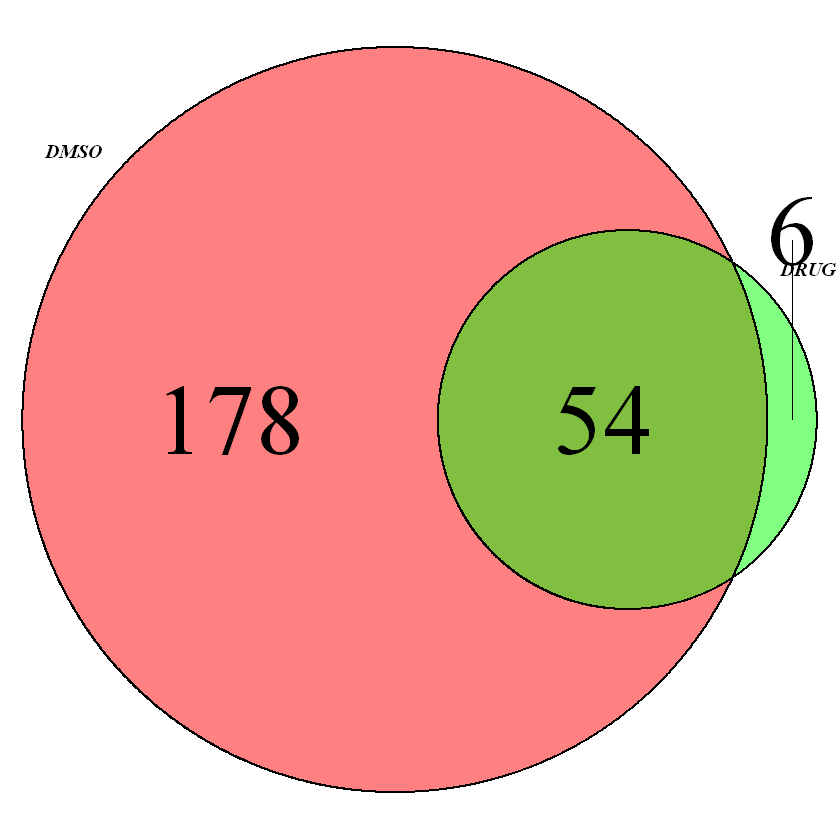

In [21]:
venn.plot <- venn.diagram(list(row.names(dmsoP_dmso_ordered), row.names(drugP_drugR_ordered)), NULL, fill=c("red", "green"), alpha=c(0.5,0.5), 
                          cex = 5, cat.fontface=4, category.names=c("DMSO", "DRUG"))
grid.draw(venn.plot)

In [ ]:
# Bar plots of a set of interesting genes

In [16]:
# Export the genes
write.csv(dmsoP_drugP_ordered, file = "dmsoP_drugP_ordered.csv")
write.csv(dmsoR_drugR_ordered, file = "dmsoR_drugR_ordered.csv")

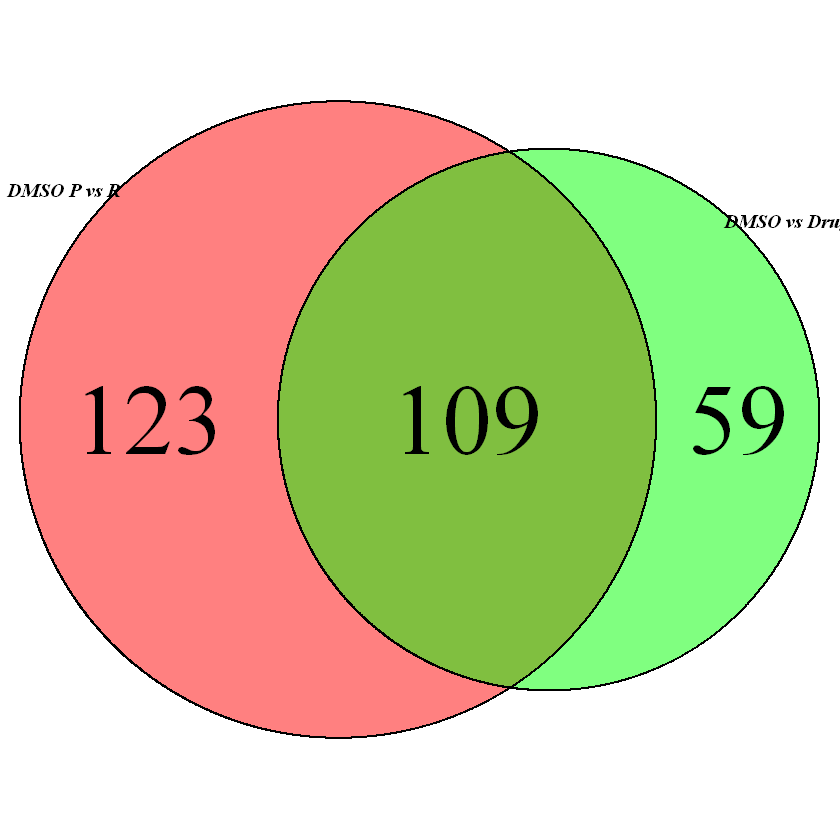

In [52]:
venn.plot <- venn.diagram(list(row.names(dmsoP_drugP_ordered), row.names(dmsoP_drug_ordered)), NULL, fill=c("red", "green"), alpha=c(0.5,0.5), 
                          cex = 5, cat.fontface=4, category.names=c("DMSO P vs R", "DMSO vs Drug"))
grid.draw(venn.plot)

In [22]:
# Export data
write.csv(drugP_drugR_ordered, file = "drugP_drugR_ordered.csv")

In [87]:
c3 <- cbind(list(row.names(dmsoP_dmso_ordered), row.names(dmsoP_drug_ordered), row.names(dmsoP_drugP_ordered)))
c3

"C6orf48 , IFITM3 , CSNK2B , FLOT1 , RGS16 , TM4SF1 , VIM , LYN , LSM2 , RP11-538I12.3, ABCF1 , HLA-E , MRPS18B , BAG6 , HLA-C , TUBB , IRF4 , CD163 , RPL13 , SYN1 , NELFE , CA9 , VARS , SAMSN1 , TNFRSF9 , ALG3 , CITED2 , PLAUR , AQP9 , VGF , RPL35A , RP5-1028K7.2 , CHST2 , CLIC1 , FBXO32 , TRIM27 , CHI3L1 , IL1R1 , COPB2 , GRN , GOT2 , GNAS , PAPD5 , TUBBP1 , SKIV2L , RPL13P12 , COX4I1 , C16orf80 , CTBP2 , PPP1R18 , SEC31B , TFRC , SERPINB1 , VCAN , TCF19 , GPX1 , PTPRCAP , EGR1 , ANXA1 , PCED1A , CRNDE , U2SURP , GPR97 , STC1 , TRIM26 , MBNL1 , TNS4 , AP2M1 , FAM192A , TMSB4XP8 , SDCBP , RFTN1 , EHMT2 , TRAPPC2L , CALM3 , TRA2B , ITPA , PRR3 , DEF8 , SAR1A , UAP1 , PSMF1 , LITAF , VARS2 , CD44 , GALK1 , FBXO45 , GINS2 , EMP1 , POLR2H , CNBP , CDKN1A , SGK1 , STEAP1 , CCL20 , GNL3 , BLVRB , CLU , HCLS1 , CLEC4D , FSCN1 , VGLL3 , CSNK2A2 , KIAA1671 , SCARNA22 , ACTR1B , GNL1 , HSPA1B , NDUFS6 , TMSB10 , GNB2L1 , LTBR , CNOT1 , UROD , PARL , SNRPB , IQCG , MAGEF1 , CSNK2A1 , DYNC2H1 , CDK6 , SLC39A4 , FBXO5 , ACTN1 , STOM , MT2A , HLA-A , AEBP1 , ID1 , HSBP1 , SLC25A36 , RNF157 , EIF4G1 , HSPA1A , BRD7 , NEU1 , MT-TY , MT-ND2 , SMYD3 , EIF4A2 , MICB , TMSB4X , MYH10 , RPL35AP21 , FYTTD1 , CHD9 , NCOA7 , TMEM173 , NUP93 , MT-CO2 , MRPS22 , DHX16 , SLC51A , NCBP2 , PLOD2 , DUSP3 , COQ9 , FAM150B , PSMD2 , ITGB4 , LTBP1 , NSFL1C , RPS12 , GOLGA4 , CCHCR1 , HEBP2 , HSD17B7 , CMSS1 , RNF213 , IFNGR1 , DCTN2 , OXA1L , CCDC102A , PREX1 , GPANK1 , ATP13A3 , SUMF2 , NAMPT , FKBP1A , MEIS2 , PRRC2A , RP11-168O16.1, RPS20 , C11orf57 , RNF5 , SLC39A8 , MRFAP1 , NRM , CDKN3 , N4BP1 , FARS2 , RAB13 , FEM1C , C6orf62 , MANF , RP11-742N3.1 , ZC3H4 , SF3B5 , HSPB1 , DNAJC19 , ZMAT3 , CTSL , ARL2BP , ETHE1 , RABAC1 , CCDC50 , SAMD4B , RAB7A , CPNE1 , IMPDH2 , AEBP2 , MED13L , UGP2 , SLC12A8 , C6orf136 , OGFOD1 , HLA-B , SNRPD2 , LEF1 , NMB , PSMD7 , CENPN , FADS1 , MDC1 , B2M , GLG1 , NAA50 , PSMB6 , CPNE3 , PERP , RAB32 , AKAP13"
"C6orf48 , RGS16 , CHI3L1 , IFITM3 , CSNK2B , BAG6 , SPP1 , VIM , NELFE , HLA-E , VARS , ABCF1 , FLOT1 , CASC15 , FCRLB , MRPS18B , LYN , HLA-C , SYNPO , AP2M1 , TFRC , MT-ND2 , LSM2 , TUBB , RPL35A , RNA5-8SP6 , HSPA1A , ALG3 , IL10 , SLC51A , SYN1 , AEBP1 , TRIM27 , GOT2 , TM4SF1 , GNL1 , RP11-538I12.3, HLA-A , C16orf80 , U2SURP , COX4I1 , BLVRB , IL2RA , TMSB10 , ODC1 , CLIC1 , EIF4A2 , AKAP13 , TPM4 , SNRPB , CD163 , FBXO5 , IRF4 , IQCG , NRP1 , NEU1 , SAMSN1 , CRNDE , POLR2H , TNFRSF9 , UAP1 , LITAF , RPL13 , CMC2 , GPX1 , RNF5 , TCF4 , CA9 , PAPD5 , MRPL14 , NAA50 , STC1 , CTBP2 , GNAS , BCLAF1 , DEF8 , AQP9 , CCND3 , TRA2B , EHMT2 , GRN , PRF1 , GOLGA4 , IMPDH2 , LRP10 , SLC7A5 , PARL , SLC25A36 , HLA-B , TRAPPC2L , UGP2 , PCNA , NUP93 , CNBP , RPL32 , GPANK1 , SEC31B , PERP , CHST2 , CD59 , PIM1 , CALM3 , ID1 , PALLD , PM20D2 , PPP1R18 , IL1R1 , AC112721.1 , CSNK2A2 , MDC1 , PSMB5 , SDCBP , IMPA2 , ARHGAP27 , LTV1 , SIPA1 , TUBBP1 , MT-ATP6 , RABAC1 , EIF2B5 , SKIV2L , ZNRD1 , CLEC4D , ANKRD11 , NAMPT , SLC1A5 , TRIM26 , RPL13P12 , TMSB4X , GTPBP8 , CYBA , NEAT1 , ANXA11 , IL4R , MRPS22 , GALNT10 , MICB , SGK1 , GNB2L1 , MAP3K13 , CITED2 , HSPA1B , SH2D2A , NDUFAF3 , RPL24 , DCTN2 , RAB32 , DDX27 , GYG1 , MRPL36 , MYBPC2 , CLIP1 , SAR1A , CDT1 , TCF25 , MBNL1 , CDK5RAP2 , GINS2 , MKI67 , HSBP1 , KCTD20 , VARS2 , AGTPBP1 , C6orf62 , F5 , HCLS1 , THPO , UQCC2"
"C6orf48, RGS16 , CHI3L1 , IFITM3 , CSNK2B , BAG6 , SPP1 , VIM , NELFE , HLA-E , VARS , ABCF1 , FLOT1 , CASC15 , FCRLB , MRPS18B, LYN , HLA-C , SYNPO , AP2M1 , TFRC , MT-ND2"


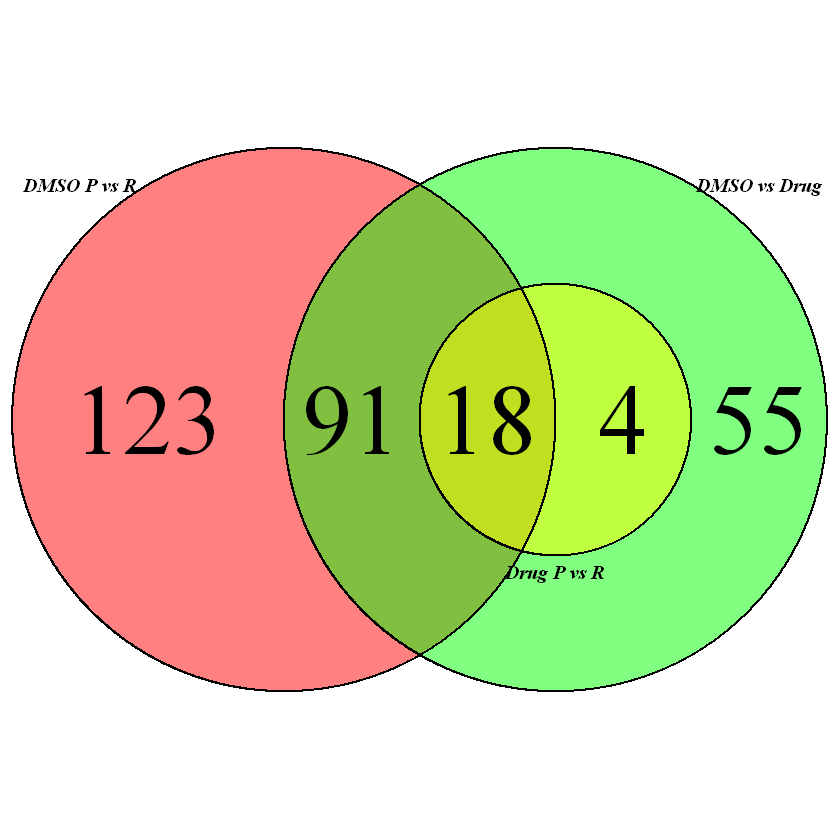

In [98]:
venn.plot <- venn.diagram(list(row.names(dmsoP_dmso_ordered), row.names(dmsoP_drug_ordered), row.names(dmsoP_drugP_ordered)), NULL, fill=c("red", "green","yellow"), alpha=c(0.5,0.5,0.5), 
                          cex = 5, cat.fontface=4, category.names=c("DMSO P vs R", "DMSO vs Drug", "Drug P vs R"))
grid.draw(venn.plot)

## Analysis of intresting clusters from Graphia

In [8]:
# Import intresting genes
intgenes <- read.csv (file ="clusters from graphia_7_1.csv", row.names = 1)

In [46]:
#sub1
#row.names(intgenes[which(intgenes$Function=='Genes activated by drug but no longer in resistant lines' & intgenes$Log2.Fold.change <= -1.2), ])
#row.names(intgenes[which(intgenes$Function=='Genes activated by drug but no longer in resistant lines'), ])
#sub2
#row.names(intgenes[which(intgenes$Function=='Genes activated by drug in resistant lines' & intgenes$Log2.Fold.change <= 1), ])
row.names(intgenes[which(intgenes$Function=='Genes activated by drug in resistant lines'), ])

[1] "GPX1"    "SH2D2A"  "SLC46A1" "CHI3L1"  "AEBP1"   "DLGAP4"  "HMOX1"

In [47]:
# Subset expression matrix with genes of interest
sub1 <- n_data[row.names(intgenes[which(intgenes$Function=='Genes activated by drug but no longer in resistant lines' & intgenes$Log2.Fold.change <= -1.2), ]),
                   c("P1_Len","P2_Len","P3_Len","P1_Pom","P2_Pom","P3_Pom","R1_Len","R2_Len","R3_Len","R1_Pom","R2_Pom","R3_Pom")]
#Genes activated by drug in resistant lines
sub2 <- n_data[row.names(intgenes[which(intgenes$Function=='Genes activated by drug in resistant lines'), ]),
                   c("P1_Len","P2_Len","P3_Len","P1_Pom","P2_Pom","P3_Pom","R1_Len","R2_Len","R3_Len","R1_Pom","R2_Pom","R3_Pom")]

In [26]:
dim(sub1)

[1] 36 12

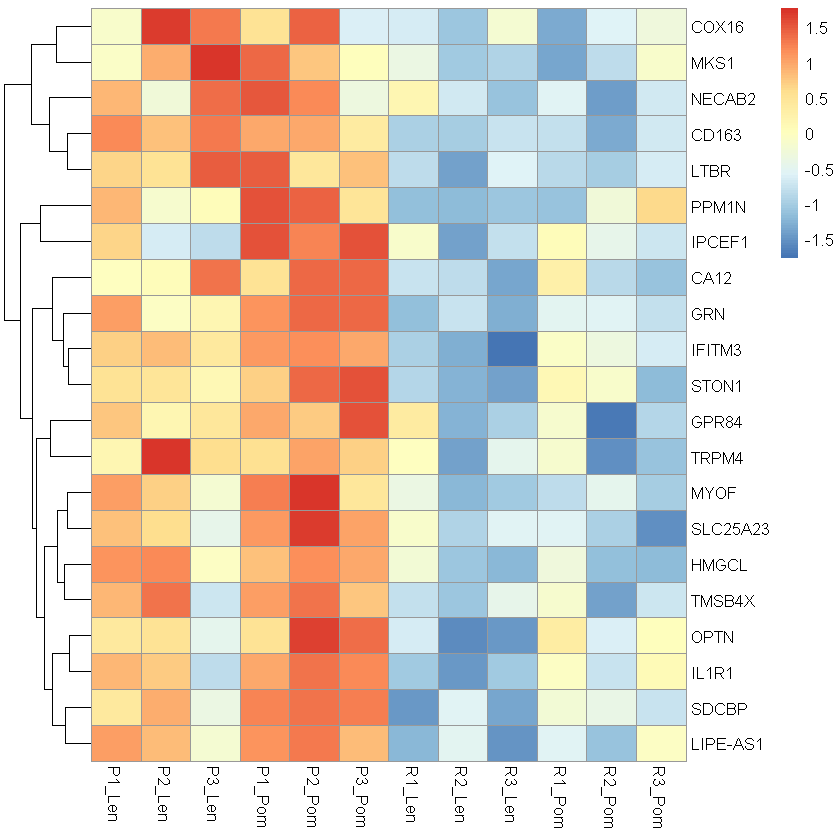

In [37]:
# Heat map of the significant genes (DEG)
#df <- as.data.frame(colData(dds)[,c("Treatment","Resistance")]) annotation_col=df
pheatmap(sub1, cluster_rows=TRUE, show_rownames=TRUE,
         cluster_cols=F, scale= "row")

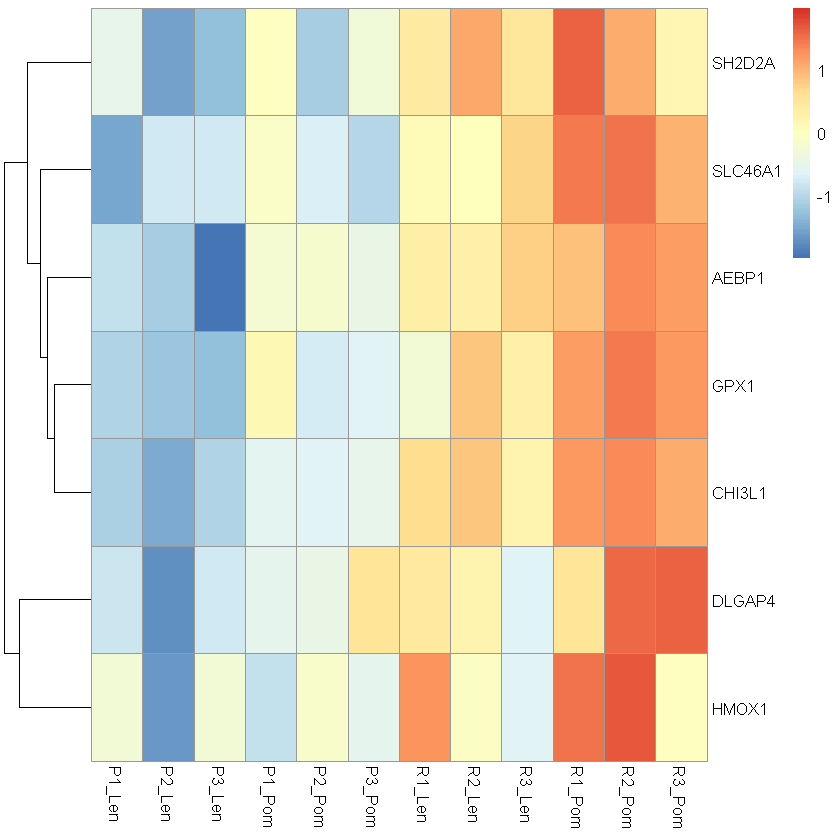

In [48]:
# Heat map of the significant genes (DEG)
#df <- as.data.frame(colData(dds)[,c("Treatment","Resistance")]) annotation_col=df
pheatmap(sub2, cluster_rows=TRUE, show_rownames=TRUE,
         cluster_cols=F, scale= "row")